# PCA(Principal Component Analysis)

It is one of most used Dimensionality reduction technique.

- Principal component analysis is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

# Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# For processing and maths
import numpy as np
import pandas as pd
import re
import requests
import pickle

In [4]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)-Loading datasets 

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.shape

(569, 30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

### 2a)-Checking all variables with their data-type

In [13]:
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
mean radius,float64
worst concave points,float64
worst concavity,float64
worst compactness,float64
worst smoothness,float64
worst area,float64
worst perimeter,float64
worst texture,float64
worst radius,float64
fractal dimension error,float64


### 2b)-Checking missing values

In [14]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [15]:
summary_missing(df)

No. of fields:  569
No. of missing fields:  0


,No. of mising Value,%age of missing Value


### 2c)- checking duplicate vales

In [16]:
print(df.duplicated().sum())

0


# 3)-PCA

### 3a)-Scaling data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_data = scaler.transform(df)

### 3b)-Applying PCA

same fit and transform

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Two components to be shown on x-axis and y-axis
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
x_pca = pca.transform(scaled_data)

### 3c)- Difference in scaled and reduced data

In [21]:
scaled_data.shape

(569, 30)

In [22]:
x_pca.shape

(569, 2)

### 3d)-plot given two dimensions out

In [23]:
# main values in target variable
cancer.target[:5]

array([0, 0, 0, 0, 0])

Text(0,0.5,'Second Principal Component')

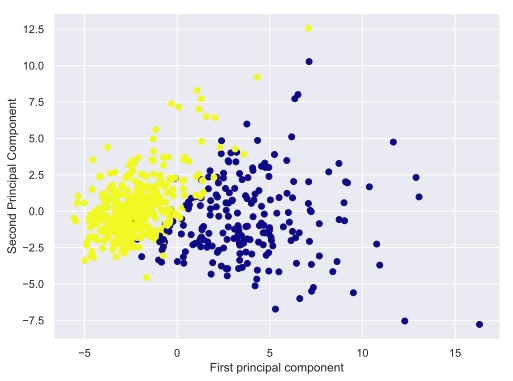

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

# 4)-Interpreting the components

In [25]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])


In this numpy matrix array, each row represents a principal component, and each column relates back to the original features.

### Heat Map

In [26]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

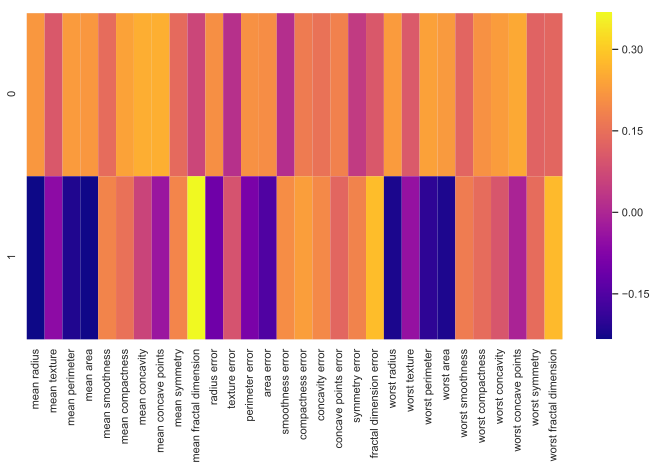

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

# 5)- Applying a machine learning model

In [28]:
X=scaled_data
y=cancer['target']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2019)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9736842105263158


Our accuracy score is 97.3 % with scaled data. Let's see how PCA would perform in this case !

In [33]:
X_new=x_pca
y=cancer['target']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.20, random_state=2019)

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred = lr.predict(X_test)

In [37]:
print(accuracy_score(y_test, y_pred))

0.9385964912280702


What does this tell us?<br>
Our model with all given features has performed better than our PCA reduced dimensionality. Reason could be that we have converted into such skewed form that these two components may not give better accuracy score than our sacled data did. <br>
There is a way to find how to find optimal size of components. Stay tuned !

In [38]:
X=scaled_data

In [39]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [40]:
X.shape

(569, 30)

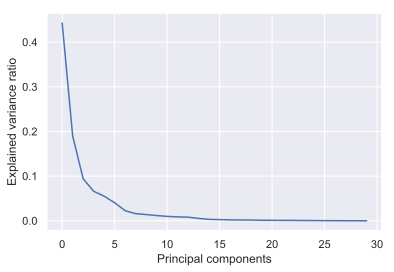

In [41]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,30), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

From above figure, we will choose 8 as the dimensions of Principal components.

In [42]:
pca = PCA(n_components = 20)
x_pca = pca.fit_transform(X)
print(x_pca, end = '\n\n')

[[ 9.19283683  1.94858307 -1.12316616 ... -0.54956269 -0.1337675
   0.3455649 ]
 [ 2.3878018  -3.76817174 -0.52929269 ...  0.31829738  0.24756463
  -0.11413308]
 [ 5.73389628 -1.0751738  -0.55174759 ... -0.08797493  0.39262636
  -0.20453223]
 ...
 [ 1.25617928 -1.90229671  0.56273053 ...  0.02110806  0.04201985
  -0.08141992]
 [10.37479406  1.67201011 -1.87702933 ... -0.30687352 -0.31056879
   0.17321637]
 [-5.4752433  -0.67063679  1.49044308 ... -0.18097241 -0.18910358
   0.16325407]]



In [43]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396
 0.00164925 0.00103865]


In [44]:
sum(pca.explained_variance_ratio_)

0.9955720432628129

In [45]:
x_pca.shape

(569, 20)

In [46]:
y=cancer['target']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

In [48]:
print(X_train.shape)
print(X_test.shape)

(455, 20)
(114, 20)


In [49]:
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_pred = lr.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_pred))

0.9649122807017544


So we get our accuracy imporved from 93% to 96%. 